Esté um notebook Colab contendo exercícios de programação em python, numpy e pytorch.

## Coloque seu nome

In [ ]:
print('Meu nome é: Gabriel Victor de Sousa Lopes')

Meu nome é: Gabriel Victor de Sousa Lopes


# Parte 1:

##Exercícios de Processamento de Dados

Nesta parte pode-se usar as bibliotecas nativas do python como a `collections`, `re` e `random`. Também pode-se usar o NumPy.

##Exercício 1.1
Crie um dicionário com os `k` itens mais frequentes de uma lista.

Por exemplo, dada a lista de itens `L=['a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a']` e `k=2`, o resultado deve ser um dicionário cuja chave é o item e o valor é a sua frequência: {'a': 4, 'e': 3}

In [ ]:
def top_k(L, k):
  # Escreva aqui o código
    dicionario = dict([(x,L.count(x)) for x in set(L)]) 
    order_dict = sorted(dicionario.items(), key=lambda x: x[1], reverse=True)
    return  order_dict[:k]

Mostre que sua implementação está correta usando uma entrada com poucos itens:

In [ ]:
L = ['f', 'a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a', 'd']
k = 3
resultado = top_k(L=L, k=k)
print(f'resultado: {resultado}')

resultado: [('a', 4), ('d', 3), ('e', 3)]


Mostre que sua implementação é eficiente usando uma entrada com 10M de itens:

In [ ]:
import random
L = random.choices('abcdefghijklmnopqrstuvwxyz', k=10_000_000)
k = 10000

In [ ]:
%%timeit
resultado = top_k(L=L, k=k)

1 loop, best of 5: 3.45 s per loop


## Exercício 1.2

Em processamento de linguagem natural, é comum convertemos as palavras de um texto para uma lista de identificadores dessas palavras. Dado o dicionário `V` abaixo onde as chaves são palavras e os valores são seus respectivos identificadores, converta o texto `D` para uma lista de identificadores.

Palavras que não existem no dicionário deverão ser convertidas para o identificador do token `unknown`.

O código deve ser insensível a maiúsculas (case-insensitive).

Se atente que pontuações (vírgulas, ponto final, etc) também são consideradas palavras.

In [ ]:
#Função para separar os caracteres especiais na String
def chr_replace(old, to_replace):
    new_string = old
    for x in to_replace:
        new_string = new_string.replace(x, ' '+x+' ')
    return new_string


def tokens_to_ids(text, vocabulary):
    
    words =  chr_replace(text, ".,;:!?%&*$()/#").split() #Lista de caracteres presentes na string

    ident = list()

    for k in words:
      if (k.lower() in vocabulary):
          ident.append(vocabulary[k.lower()])
      else:
        ident.append(vocabulary['unknown'])

    return ident

Mostre que sua implementação esta correta com um exemplo pequeno:

---



In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = 'Eu gosto de comer pizza.'

print(tokens_to_ids(D, V))

[1, 3, 2, 4, -1, 5]


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = ' '.join(1_000_000 * ['Eu gosto de comer pizza.'])

In [ ]:
%%timeit
resultado = tokens_to_ids(D, V)

1 loop, best of 5: 2.27 s per loop


## Exercício 1.3

Em aprendizado profundo é comum termos que lidar com arquivos muito grandes.

Dado um arquivo de texto onde cada item é separado por `\n`, escreva um programa que amostre `k` itens desse arquivo aleatoriamente.

Nota 1: Assuma amostragem de uma distribuição uniforme, ou seja, todos os itens tem a mesma probablidade de amostragem.

Nota 2: Assuma que o arquivo não cabe em memória.

Nota 3: Utilize apenas bibliotecas nativas do python.

In [ ]:
import random
import linecache 

def sample(path: str, k: int):

  a_file = open(filename,"r")
  n = 0
  for line in a_file:
      n += 1;

  randomList = []

  for i in range(0, k): 
      num = random.randint(0,n)
      while num in randomList:
        num = random.randint(0,n)
        
      randomList.append(num)
  
  item = []

  for i in randomList:
    line = linecache.getline(filename, i)
    item.append(line.split("\n")[0])

  return item

Mostre que sua implementação está correta com um exemplo pequeno:

In [ ]:
filename = 'small.txt'
total_size = 100
n_samples = 10

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))


samples = sample(path=filename, k=n_samples)
print(samples)
print(len(samples) == n_samples)

['line 19', 'line 33', 'line 53', 'line 22', 'line 84', 'line 99', 'line 32', 'line 68', 'line 75', 'line 45']
True


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
filename = 'large.txt'
total_size = 1_000_000
n_samples = 10000

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

In [ ]:
%%timeit
samples = sample(path=filename, k=n_samples)
assert len(samples) == n_samples

1 loop, best of 5: 798 ms per loop


# Parte 2:

##Exercícios de Numpy

Nesta parte deve-se usar apenas a biblioteca NumPy. Aqui não se pode usar o PyTorch.

##Exercício 2.1

Quantos operações de ponto flutuante (flops) de soma e de multiplicação tem a multiplicação matricial $AB$, sendo que a matriz $A$ tem tamanho $m \times n$ e a matriz $B$ tem tamanho $n \times p$?

Resposta:
- número de somas: 
- número de multiplicações: 

## Exercício 2.2

Em programação matricial, não se faz o loop em cada elemento da matriz,
mas sim, utiliza-se operações matriciais.

Dada a matriz `A` abaixo, calcule a média dos valores de cada linha sem utilizar laços explícitos.

Utilize apenas a biblioteca numpy.

In [3]:
import numpy as np

In [ ]:
A = np.arange(24).reshape(4, 6)
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
# Escreva sua solução aqui.
print(np.mean(A, axis=1))

[ 2.5  8.5 14.5 20.5]


## Exercício 2.3

Seja a matriz $C$ que é a normalização da matriz $A$:
$$ C(i,j) = \frac{A(i,j) - A_{min}}{A_{max} - A_{min}} $$

Normalizar a matriz `A` do exercício acima de forma que seus valores fiquem entre 0 e 1.

In [ ]:
# Escreva sua solução aqui.
C = (A - np.min(A))/(np.max(A)-np.min(A))
print(C)

[[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913 ]
 [0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087]
 [0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043]
 [0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]]


## Exercício 2.4

Modificar o exercício anterior de forma que os valores de cada *coluna* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras colunas.


In [ ]:
# Escreva sua solução aqui.
D = (A - np.min(A,axis=0))/(np.max(A,axis=0)-np.min(A,axis=0))
print(D)

[[0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         1.         1.        ]]


## Exercício 2.5

Modificar o exercício anterior de forma que os valores de cada *linha* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras linhas.


In [ ]:
# Escreva sua solução aqui.
E = (A - np.min(A,axis=1).reshape(4,1))/(np.max(A,axis=1)-np.min(A,axis=1)).reshape(4,1)
print(E)

[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


## Exercício 2.6

A [função softmax](https://en.wikipedia.org/wiki/Softmax_function) é bastante usada em apredizado de máquina para converter uma lista de números para uma distribuição de probabilidade, isto é, os números ficarão normalizados entre zero e um e sua soma será igual à um.

Implemente a função softmax com suporte para batches, ou seja, o softmax deve ser aplicado a cada linha da matriz. Deve-se usar apenas a biblioteca numpy. Se atente que a exponenciação gera estouro de representação quando os números da entrada são muito grandes. Tente corrigir isto.

In [ ]:
import numpy as np


def softmax(A):
    '''
    Aplica a função de softmax à matriz `A`.

    Entrada:
      `A` é uma matriz M x N, onde M é o número de exemplos a serem processados
      independentemente e N é o tamanho de cada exemplo.
    
    Saída:
      Uma matriz M x N, onde a soma de cada linha é igual a um.
    '''
    C = (A - np.min(A))/(np.max(A)-np.min(A))
 
    return  np.exp(C) / np.sum(np.exp(C), axis=1,  keepdims=True)

Mostre que sua implementação está correta usando uma matriz pequena como entrada:

In [ ]:
A = np.array([[0.5, -1, 1000],
              [-2,   0, 0.5]])
softmax(A)

array([[0.21231367, 0.21199608, 0.57569025],
       [0.33283451, 0.33349952, 0.33366597]])

O código a seguir verifica se sua implementação do softmax está correta. 
- A soma de cada linha de A deve ser 1;
- Os valores devem estar entre 0 e 1

In [ ]:
np.allclose(softmax(A).sum(axis=1), 1) and softmax(A).min() >= 0 and softmax(A).max() <= 1

True

Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
A = np.random.uniform(low=-10, high=10, size=(128, 100_000))

In [ ]:
%%timeit
softmax(A)

1 loop, best of 5: 467 ms per loop


In [ ]:
SM = softmax(A)
np.allclose(SM.sum(axis=1), 1) and SM.min() >= 0 and SM.max() <= 1

True

## Exercício 2.7

A codificação one-hot é usada para codificar entradas categóricas. É uma codificação onde apenas um bit é 1 e os demais são zero, conforme a tabela a seguir.

| Decimal | Binary | One-hot
| ------- | ------ | -------
| 0 | 000    | 1 0 0 0 0 0 0 0
| 1 | 001    | 0 1 0 0 0 0 0 0
| 2 | 010    | 0 0 1 0 0 0 0 0
| 3 | 011    | 0 0 0 1 0 0 0 0
| 4 | 100    | 0 0 0 0 1 0 0 0
| 5 | 101    | 0 0 0 0 0 1 0 0
| 6 | 110    | 0 0 0 0 0 0 1 0
| 7 | 111    | 0 0 0 0 0 0 0 1

Implemente a função one_hot(y, n_classes) que codifique o vetor de inteiros y que possuem valores entre 0 e n_classes-1.


In [ ]:
def one_hot(y, n_classes):
    # Escreva seu código aqui.
    return np.eye(n_classes)[y]

In [ ]:
N_CLASSES = 9
N_SAMPLES = 10
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)
print(y)
print(one_hot(y, N_CLASSES))

[4 2 3 0 2 2 2 0 2 8]
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
N_SAMPLES = 100_000
N_CLASSES = 1_000
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
%%timeit
one_hot(y, N_CLASSES)

10 loops, best of 5: 99.7 ms per loop


## Exercício 2.8

Implemente uma classe que normalize um array de pontos flutuantes `array_a` para a mesma média e desvio padrão de um outro array `array_b`, conforme exemplo abaixo:
```
array_a = np.array([-1, 1.5, 0])
array_b = np.array([1.4, 0.8, 0.3, 2.5])
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)  # Deve imprimir [0.3187798  2.31425165 1.11696854]
```

In [5]:
def Normalizer(array):
  std = np.std(array)
  mean = np.mean(array)
  def norm(array_a):
    new_norm = (array_a - np.mean(array_a)) / np.std(array_a)
    return new_norm * std + mean
  return norm

Mostre que seu código está correto com o exemplo abaixo:

In [6]:
array_a = [-1, 1.5, 0]
array_b = [1.4, 0.8, 0.3, 2.5]
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)


[0.3187798  2.31425165 1.11696854]


# Parte 3:

##Exercícios Pytorch: Grafo Computacional e Gradientes

Nesta parte pode-se usar quaisquer bibliotecas.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada através do cálculo automático do gradiente e construção dinâmica do grafo computacional.

## Grafo computacional

Seja um exemplo simples de uma função de perda J dada pela Soma dos Erros ao Quadrado (SEQ - Sum of Squared Errors): 
$$ J = \sum_i (x_i w - y_i)^2 $$
que pode ser reescrita como:
$$ \hat{y_i} = x_i w $$
$$ e_i = \hat{y_i} - y_i $$
$$ e2_i = e_i^2 $$
$$ J = \sum_i e2_i $$

As redes neurais são treinadas através da minimização de uma função de perda usando o método do gradiente descendente. Para ajustar o parâmetro $w$ precisamos calcular o gradiente $  \frac{ \partial J}{\partial w} $. Usando a
regra da cadeia podemos escrever:
$$ \frac{ \partial J}{\partial w} = \frac{ \partial J}{\partial e2_i} \frac{ \partial e2_i}{\partial e_i} \frac{ \partial e_i}{\partial \hat{y_i} } \frac{ \partial \hat{y_i}}{\partial w}$$ 

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J podem ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [ ]:
import torch

In [ ]:
torch.__version__

'1.10.0+cu111'

**Tensor com atributo .requires_grad=True**

Quando um tensor possui o atributo `requires_grad` como verdadeiro, qualquer expressão que utilizar esse tensor irá construir um grafo computacional para permitir posteriormente, após calcular a função a ser derivada, poder usar a regra da cadeia e calcular o gradiente da função em termos dos tensores que possuem o atributo `requires_grad`.


In [ ]:
y = torch.arange(0, 8, 2).float()
y

tensor([0., 2., 4., 6.])

In [ ]:
x = torch.arange(0, 4).float()
x

tensor([0., 1., 2., 3.])

In [ ]:
w = torch.ones(1, requires_grad=True)
w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum_i ((x_i  w) - y_i)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

## Forward pass

Durante a execução da expressão, o grafo computacional é criado. Compare os valores de cada parcela calculada com os valores em preto da figura ilustrativa do grafo computacional.

In [ ]:
# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)

# cálculo da perda J: loss
e = y_pred - y; print('e =',e)
e2 = e.pow(2) ; print('e2 =', e2)
J = e2.sum()  ; print('J =', J)

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)
e = tensor([ 0., -1., -2., -3.], grad_fn=<SubBackward0>)
e2 = tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
J = tensor(14., grad_fn=<SumBackward0>)


## Backward pass

O `backward()` varre o grafo computacional a partir da variável a ele associada (raiz) e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
Observe que os tensores que tiverem o atributo `requires_grad` serão sempre folhas no grafo computacional.
O `backward()` destroi o grafo após sua execução. Esse comportamento é padrão no PyTorch. 

A título ilustrativo, se quisermos depurar os gradientes dos nós que não são folhas no grafo computacional, precisamos primeiro invocar `retain_grad()` em cada um desses nós, como a seguir. Entretanto nos exemplos reais não há necessidade de verificar o gradiente desses nós.

In [ ]:
e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

E agora calculamos os gradientes com o `backward()`.

w.grad é o gradiente de J em relação a w.

In [ ]:
if w.grad: w.grad.zero_()
J.backward()
print(w.grad)

tensor([-28.])


Mostramos agora os gradientes que estão grafados em vermelho no grafo computacional:

In [ ]:
print(e2.grad)
print(e.grad)
print(y_pred.grad)

tensor([1., 1., 1., 1.])
tensor([ 0., -2., -4., -6.])
tensor([ 0., -2., -4., -6.])


##Exercício 3.1
Calcule o mesmo gradiente ilustrado no exemplo anterior usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [ ]:
def J_func(w, x, y):
    # programe a função J_func, para facilitar
    y_pred = x * w
    e = y_pred - y
    e2 = e.pow(2)
    J = e2.sum() 
    return J

def dJ_diff (w, x, y, delt_w):
  return (J_func((w+delt_w), x, y) - J_func((w - delt_w), x, y))/(2*delt_w)

# Calcule o gradiente usando a regra diferenças finitas
# Confira com o valor já calculado anteriormente
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
delt_w = 1e-3

grad = dJ_diff(w, x, y,delt_w)
print('grad=', grad)

grad= tensor(-28.0008)


##Exercício 3.2

Minimizando $J$ pelo gradiente descendente

$$ w_{k+1} = w_k - \lambda \frac {\partial J}{\partial w} $$

Supondo que valor inicial ($k=0$) $w_0 = 1$, use learning rate $\lambda = 0.01$ para calcular o valor do novo $w_{20}$, ou seja, fazendo 20 atualizações de gradientes. Deve-se usar a função `J_func` criada no exercício anterior.

Confira se o valor do primeiro gradiente está de acordo com os valores já calculado acima

i = 0
J= tensor(14.)
grad = tensor(-28.0008)
w = tensor([1.2800])
i = 1
J= tensor(7.2574)
grad = tensor(-20.1611)
w = tensor([1.4816])
i = 2
J= tensor(3.7621)
grad = tensor(-14.5156)
w = tensor([1.6268])
i = 3
J= tensor(1.9501)
grad = tensor(-10.4510)
w = tensor([1.7313])
i = 4
J= tensor(1.0109)
grad = tensor(-7.5245)
w = tensor([1.8065])
i = 5
J= tensor(0.5240)
grad = tensor(-5.4175)
w = tensor([1.8607])
i = 6
J= tensor(0.2716)
grad = tensor(-3.9003)
w = tensor([1.8997])
i = 7
J= tensor(0.1408)
grad = tensor(-2.8083)
w = tensor([1.9278])
i = 8
J= tensor(0.0730)
grad = tensor(-2.0218)
w = tensor([1.9480])
i = 9
J= tensor(0.0378)
grad = tensor(-1.4557)
w = tensor([1.9626])
i = 10
J= tensor(0.0196)
grad = tensor(-1.0482)
w = tensor([1.9731])
i = 11
J= tensor(0.0102)
grad = tensor(-0.7546)
w = tensor([1.9806])
i = 12
J= tensor(0.0053)
grad = tensor(-0.5433)
w = tensor([1.9860])
i = 13
J= tensor(0.0027)
grad = tensor(-0.3912)
w = tensor([1.9899])
i = 14
J= tensor(0.0014)
grad = tensor(-0.2

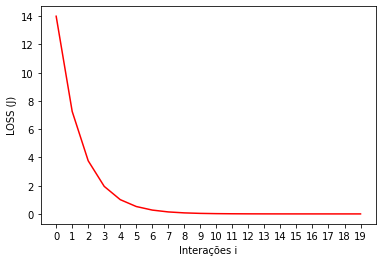

In [ ]:
import matplotlib.pyplot as plt

loss = []
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)

for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    loss.append(J)
    print('J=', J)
    grad = dJ_diff(w, x, y,delt_w)
    print('grad =',grad)
    w = w - learning_rate*grad
    print('w =', w)

# Plote o gráfico da loss J pela iteração i

# Plote o gráfico da loss J pela iteração i
plt.plot(loss, 'r')
plt.xticks(range(iteracoes))
plt.xlabel('Interações i')
plt.ylabel('LOSS (J)')
plt.show()

##Exercício 3.3

Repita o exercício 2 mas usando agora o calculando o gradiente usando o método backward() do pytorch. Confira se o primeiro valor do gradiente está de acordo com os valores anteriores. Execute essa próxima célula duas vezes. Os valores devem ser iguais.


i = 0
J= tensor(14., grad_fn=<SumBackward0>)
grad = tensor([-28.])
w = tensor([1.2800], grad_fn=<SubBackward0>)
i = 1
J= tensor(7.2576, grad_fn=<SumBackward0>)
grad = tensor([-20.1600])
w = tensor([1.4816], grad_fn=<SubBackward0>)
i = 2
J= tensor(3.7623, grad_fn=<SumBackward0>)
grad = tensor([-14.5152])
w = tensor([1.6268], grad_fn=<SubBackward0>)
i = 3
J= tensor(1.9504, grad_fn=<SumBackward0>)
grad = tensor([-10.4509])
w = tensor([1.7313], grad_fn=<SubBackward0>)
i = 4
J= tensor(1.0111, grad_fn=<SumBackward0>)
grad = tensor([-7.5247])
w = tensor([1.8065], grad_fn=<SubBackward0>)
i = 5
J= tensor(0.5241, grad_fn=<SumBackward0>)
grad = tensor([-5.4178])
w = tensor([1.8607], grad_fn=<SubBackward0>)
i = 6
J= tensor(0.2717, grad_fn=<SumBackward0>)
grad = tensor([-3.9008])
w = tensor([1.8997], grad_fn=<SubBackward0>)
i = 7
J= tensor(0.1409, grad_fn=<SumBackward0>)
grad = tensor([-2.8086])
w = tensor([1.9278], grad_fn=<SubBackward0>)
i = 8
J= tensor(0.0730, grad_fn=<SumBackward0>)
grad = tens

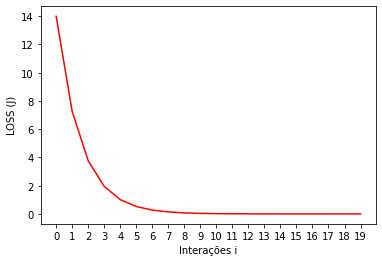

In [ ]:
learning_rate = 0.01
iteracoes = 20
loss = []

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1, requires_grad=True)

for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)  
    print('J=', J)
    J.backward()
    loss.append(J.detach().numpy())
    grad = w.grad  
    print('grad =',grad)
    w = w - learning_rate*grad
    w.retain_grad()
    print('w =', w)


# Plote aqui a loss pela iteração

plt.plot(loss, 'r')
plt.xticks(range(iteracoes))
plt.xlabel('Interações i')
plt.ylabel('LOSS (J)')
plt.show()

##Exercício 3.4

Quais são as restrições na escolha dos valores de $\Delta w$ no cálculo do gradiente por diferenças finitas?

Resposta: O valor de $\Delta w$, deve ser um valor pequeno mais diferente de 0, a fim de melhorar a acurácia do método, entretanto à medida que se diminui o valor de $\Delta w$ o custo computacional aumenta, devido ao aumento da complexidade dos cálculos dos valores. E embora o tamanho de $\Delta w$ possa ser extremamente pequeno, há um limite inferior ao usar aritmética de precisão finita. A faixa de números reais que podem ser manipulados em cálculos numéricos depende do compilador específico que é usado. Visto que caso o valor de $\Delta w$ esteja abaixo desse valor, ocorre estouro negativo e a representação desse número normalmente resulta em um valor zero.

Segundo a literatura quando o valor de $\Delta w$ é reduzido para um valor abaixo de $10^{−5}$ para a diferença central, como o caso utilizado acima, os erros de cancelamento subtrativos tornam-se significativos e as estimativas resultantes não são confiáveis. E quando o intervalo $\Delta w$ é tão pequeno que não existe diferença na saída (para etapas menores que $10^{−16}$), as estimativas de diferença finita eventualmente resultam em zero, como pode-se ver na figura abaixo. Por isso faz-se necessário a determinação de um valor de $\Delta w$ ótimo para que o método forneça resultados confiáveis.




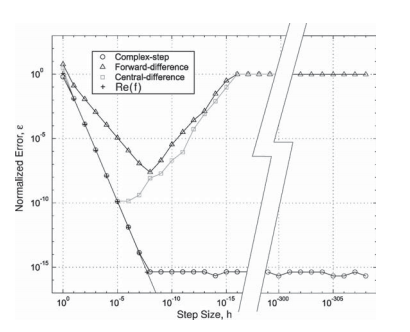




##Exercício 3.5

Até agora trabalhamos com $w$ contendo apenas um parâmetro. Suponha agora que $w$ seja uma matriz com $N$ parâmetros e que o custo para executar $(x_i w - y_i)^2$ seja $O(N)$.
> a) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método das diferencas finitas?
>
> b) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método do backpropagation?



**a)** No método das diferenças finitas, faz-se necessário calcular duas vez a derivada parcial de $J$, em função da variável $w$. Com isso, o custo computacional para uma única atualização é $2*O(N)$

**b)** Ao contrário do método das diferenças finitas, o método do backpropagation só precisa calcular $\frac{\partial J}{\partial w} $ uma única vez, com isso, o custo computacional para uma única atualização é $O(N)$

##Exercício 3.6

Qual o custo (entropia cruzada) esperado para um exemplo (uma amostra) no começo do treinamento de um classificador inicializado aleatoriamente?

A equação da entropia cruzada é:
$$L = - \sum_{j=0}^{K-1} y_j \log p_j, $$
Onde:

- K é o número de classes;

- $y_j=1$ se $j$ é a classe do exemplo (ground-truth), 0 caso contrário. Ou seja, $y$ é um vetor one-hot;

- $p_j$ é a probabilidade predita pelo modelo para a classe $j$.

A resposta tem que ser em função de uma ou mais das seguintes variáveis:

- K = número de classes

- B = batch size

- D = dimensão de qualquer vetor do modelo

- LR = learning rate

Resposta: O valor inicial da função custo, esta relacionada ao tamanho do batch size **B** utilizado no aprendizado, uma vez que a função custo (entropia cruzada) é calculada segundo a equação 1, onde a função é calculada a cada **B** amostras para que então os pesos sejam atualizados, pela média dos custos individuais das amostras.

$$L(y,p) = - \frac{1}{B}* \sum_{i=1}^{B} \sum_{j=0}^{K-1} y_j \log p_j \space\space\space (1)$$  

Dessa forma, verifica-se que o custo esperado no começo do treinamento de um classificador é dado pelo valor médio das entropias cruzadas de cada uma das amostras pertencentes do batch size.

Fim do notebook.